# Compresión de imágenes y vídeos via wavelets

## Abstract

En este proyecto se presenta un estudio sobre la compresión de imágenes y vídeo utilizando wavelets. Se comienza con una revisión teórica de los fundamentos de los wavelets y su aplicación en la compresión de imágenes. Posteriormente, se extiende el estudio a la compresión de vídeo, donde se analiza la aplicación de los wavelets en la compresión de secuencias de imágenes. Finalmente, se concluye el proyecto con una discusión sobre los resultados obtenidos y las posibles aplicaciones de la compresión de imágenes y vídeo vía wavelets.

## Contenidos teóricos


Como todo buen trabajo, tiene un motivo de interés de estudio detrás; en nuestro caso, nos centramos en la compresión de imágenes y vídeos.

### ¿Qué es una imagen?

Una imagen puede considerarse como una señal bidimensional en la que cada píxel representa valores de intensidad lumínica o de color en una ubicación específica. Es decir, cada punto de la imagen es un píxel que contiene información sobre su color y posición.

Antes de adentrarnos en el estudio de cómo comprimir vídeos, es fundamental comprender cómo se comprime una imagen. Esencialmente, se trata de representar la información visual de una manera más eficiente, reduciendo la cantidad de datos necesarios para almacenar o transmitir la imagen sin comprometer significativamente su calidad perceptible.

La compresión de imágenes juega un papel crucial en una amplia gama de aplicaciones, desde el almacenamiento eficiente de datos visuales hasta la transmisión rápida y efectiva de información gráfica en diversas plataformas y dispositivos.

La compresión de imágenes hace uso de las transformadas wavelet y sus diversas familias.

### Concepto de wavelet

Una wavelet u ondícula es una pequeña onda cuya energía está concentrada en un periodo de tiempo limitado. Su forma es la de una onda característica que oscila, lo que permite realizar análisis temporales y frecuenciales. Esta herramienta resulta de gran utilidad en el estudio de fenómenos que varían en el tiempo.

### Familias de wavelets

Hay varias familias de wavelets, cada una con sus propias características y aplicaciones específicas. A continuación, mencionaré algunas de las familias de wavelets más comunes y sus aplicaciones, centrándome en el campo de la compresión de imágenes:

1. Haar:
   - Características:
     - Es la wavelet más simple.
     - Tiene soporte compacto.
   - Aplicaciones:
     - A menudo se utiliza con fines educativos.
     - Puede ser eficiente para la detección de bordes.

2. Daubechies (db):
   - Características:
     - Tiene varias variantes según el número de coeficientes.
     - Ofrece un buen equilibrio entre localización en el tiempo y frecuencia.
   - Aplicaciones:
     - Ampliamente utilizada en compresión de imágenes y señales biomédicas.
     - Buen rendimiento en la representación de señales con características oscilatorias.

3. Symlets (sym):
   - Características:
     - Similar a Daubechies pero con mayor simetría.
     - Ofrece un compromiso entre suavidad y compacidad.
   - Aplicaciones:
     - Se utiliza en aplicaciones donde se requiere una mayor simetría en la representación.

4. Coiflets (coif):
   - Características:
     - Diseñadas para ser más suaves que las Daubechies.
     - Permiten una representación eficiente de señales con transiciones suaves.
   - Aplicaciones:
     - Útiles en casos donde se requiere una representación suave de la señal.

5. Biorthogonal (bior):
   - Características:
     - Ofrecen una mayor flexibilidad en términos de simetría y regularidad.
     - Se utilizan pares de wavelets, uno para descomposición y otro para reconstrucción.
   - Aplicaciones:
     - Útiles en compresión de imágenes y en situaciones donde se requiere una reconstrucción más exacta.

En el campo de la compresión de imágenes, diferentes familias de wavelets pueden proporcionar ventajas e inconvenientes según la naturaleza de la imagen y los requisitos específicos de la aplicación. Algunas consideraciones generales incluyen:

- Compacidad vs. Regularidad: Algunas wavelets, como las Daubechies, son compactas y pueden comprimir bien señales con bordes definidos. Otras, como las Coiflets, son más regulares y se adaptan mejor a señales más suaves.

- Reconstrucción precisa vs. Eficiencia computacional: Algunas wavelets, como las Biorthogonal, están diseñadas para lograr una reconstrucción más precisa, pero a menudo a expensas de una mayor complejidad computacional.

- Simetría: Dependiendo de la aplicación, la simetría de las wavelets puede ser un factor importante. Las wavelets simétricas, como las Symlets, pueden ser útiles en situaciones donde la simetría de la señal es crucial.

En resumen, la elección de la familia de wavelets dependerá de la naturaleza de la señal o imagen que se esté procesando, así como de los requisitos específicos de la aplicación, como la velocidad de procesamiento, la precisión de la reconstrucción y la eficiencia en la compresión.

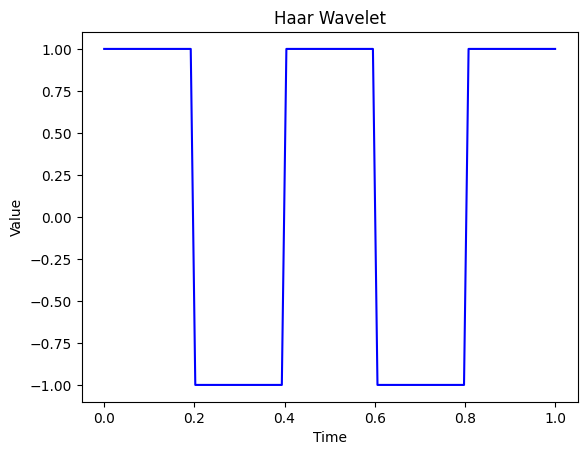

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time vector
x = np.linspace(0, 1, 100)

# Create an empty wavelet vector
haar_wavelet = np.zeros_like(x)

# Define the number of alternating intervals
num_intervals = 5

# Calculate the length of each alternating interval
interval_length = len(x) // num_intervals

# Fill the wavelet vector with +1 and -1 values in alternating intervals
for i in range(num_intervals):
    start = i * interval_length
    end = (i + 1) * interval_length
    if i % 2 == 0:
        haar_wavelet[start:end] = 1
    else:
        haar_wavelet[start:end] = -1

# Plot the Haar wavelet
plt.plot(x, haar_wavelet, color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Haar Wavelet')
plt.show()

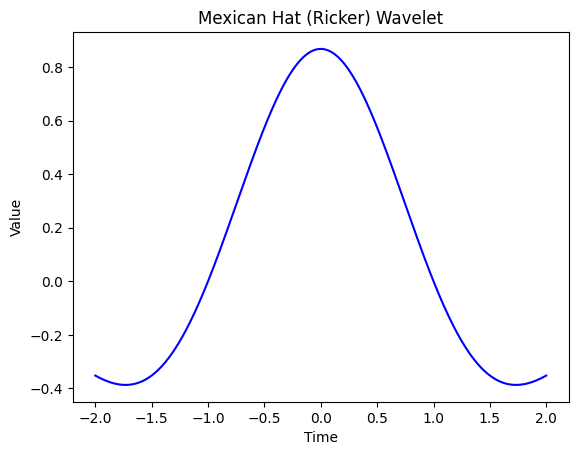

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time vector
x = np.linspace(-2, 2, 400)  # Adjust the range as needed

# Define the Mexican Hat (Ricker) wavelet function
def mexican_hat_wavelet(x):
    sigma = 1.0  # Width of the Gaussian component
    return (2 / (np.sqrt(3 * sigma) * (np.pi ** 0.25)) *
            (1 - (x ** 2) / (sigma ** 2)) * np.exp(-x ** 2 / (2 * sigma ** 2)))

# Compute the Mexican Hat wavelet for the time vector
mexican_hat = mexican_hat_wavelet(x)

# Plot the Mexican Hat (Ricker) wavelet
plt.plot(x, mexican_hat, color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Mexican Hat (Ricker) Wavelet')
plt.show()



Symlet Wavelet

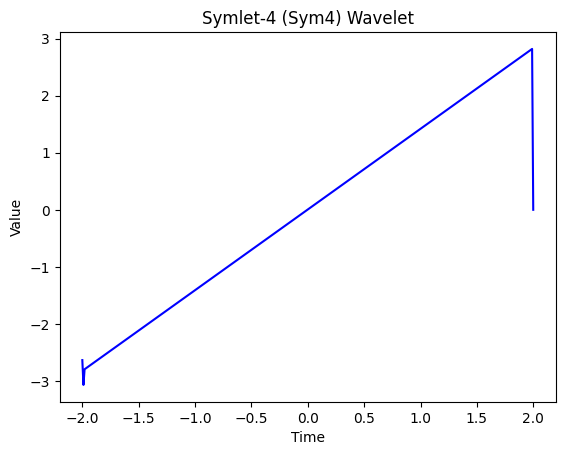

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time vector
x = np.linspace(-2, 2, 400)  # Adjust the range as needed

# Define the Symlet-4 (Sym4) wavelet coefficients
sym4_coefficients = [0.48296, 0.8365, 0.22414, -0.12940]

# Function to compute the Symlet-4 wavelet
def compute_sym4_wavelet(x, coefficients):
    n = len(coefficients)
    result = np.zeros_like(x)
    
    for i in range(len(x)-1):
        sum_val = 0
        for j in range(n):
            k = i - j + 1
            if k >= 0:
                sum_val += coefficients[j] * x[k]
        result[i] = sum_val
    
    return result

# Compute the Symlet-4 wavelet for the time vector
sym4_wavelet = compute_sym4_wavelet(x, sym4_coefficients)

# Plot the Symlet-4 (Sym4) wavelet
plt.plot(x, sym4_wavelet, color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Symlet-4 (Sym4) Wavelet')
plt.show()


Gabor Wavelet

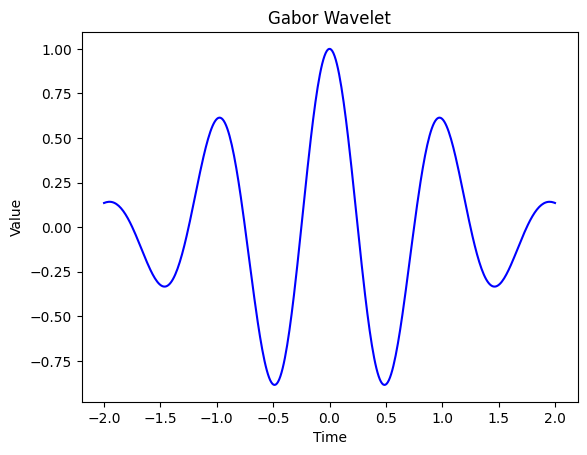

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time vector
x = np.linspace(-2, 2, 400)  # Adjust the range as needed

# Define Gabor wavelet parameters
sigma = 1.0  # Width of the Gaussian component
f = 1.0  # Frequency of the sinusoidal component
phi = 0.0  # Phase of the sinusoidal component

# Function to compute the Gabor wavelet
def gabor_wavelet(x, sigma, f, phi):
    gauss_part = np.exp(-x**2 / (2 * sigma**2))
    sinus_part = np.cos(2 * np.pi * f * x + phi)
    return gauss_part * sinus_part

# Compute the Gabor wavelet for the time vector
gabor_wavelet_values = gabor_wavelet(x, sigma, f, phi)

# Plot the Gabor wavelet
plt.plot(x, gabor_wavelet_values, color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Gabor Wavelet')
plt.show()


Biorthogonal Wavelet

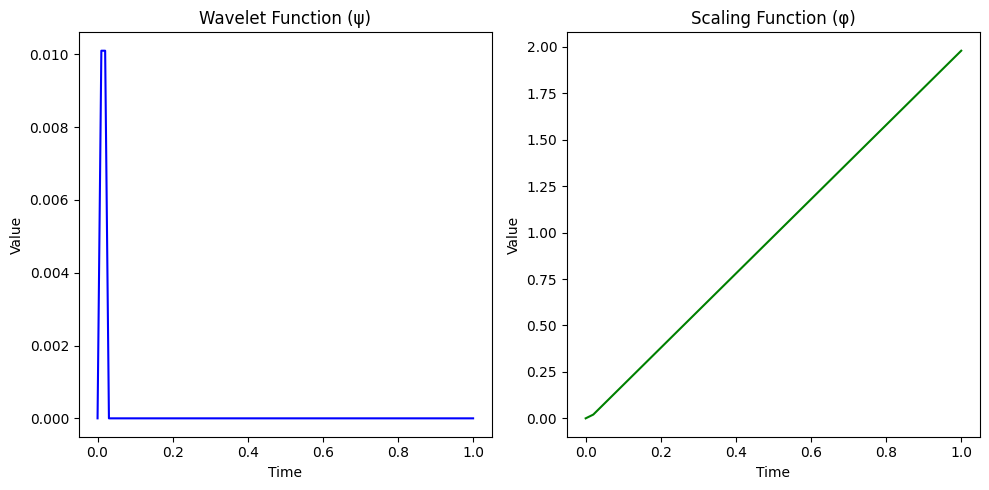

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time vector
x = np.linspace(0, 1, 100)

# Define the coefficients for the wavelet (ψ) and scaling (φ) functions
wavelet_coefficients = [1, -1, -1, 1]
scaling_coefficients = [1, 1]

# Function to compute the wavelet function (ψ)
def compute_wavelet(x, coefficients):
    n = len(coefficients)
    result = np.zeros_like(x)
    
    for i in range(len(x)):
        sum_val = 0
        for j in range(n):
            k = i - j
            if k >= 0:
                sum_val += coefficients[j] * x[k]
        result[i] = sum_val
    
    return result

# Function to compute the scaling function (φ)
def compute_scaling(x, coefficients):
    n = len(coefficients)
    result = np.zeros_like(x)
    
    for i in range(len(x)):
        sum_val = 0
        for j in range(n):
            k = i - 2 * j
            if k >= 0:
                sum_val += coefficients[j] * x[k]
        result[i] = sum_val
    
    return result

# Compute the wavelet (ψ) and scaling (φ) functions for the time vector
wavelet_function = compute_wavelet(x, wavelet_coefficients)
scaling_function = compute_scaling(x, scaling_coefficients)

# Plot the wavelet (ψ) and scaling (φ) functions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, wavelet_function, color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Wavelet Function (ψ)')

plt.subplot(1, 2, 2)
plt.plot(x, scaling_function, color='green')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Scaling Function (φ)')

plt.tight_layout()
plt.show()



## Procedimiento práctico


### Búsqueda de referencias o trabajos similares

Previo a la realización de cualquier actividad práctica, se cree conveniente realizar un apequeña revisión bibliográfica con el fin de poder tener una idea de las posibilidades que ofrecen los wavelets. En este rumbo, encontramos los siguientes trabajos:

- Familias de wavelets en Matlab - https://es.mathworks.com/help/wavelet/gs/introduction-to-the-wavelet-families.html

- Introducción a los wavelets en Python - https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

- Conceptos básicos de procesado de señales - https://www.kaggle.com/code/faressayah/signal-processing-with-python

- Paso de la FT a la WT - https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

- Compresión de imágenes usando wavelets - https://ieeexplore.ieee.org/document/801765

- Esquemas descomposición transformada wavelets - http://catarina.udlap.mx/u_dl_a/tales/documentos/meie/rosas_o_mc/capitulo2.pdf

Una vez tenemos una idea preeliminar sobre trabajo que vamos a realizar, las posibilidades dentro del marco de los wavelets y una serie de resultadoos, comenzamos a trabajar de forma práctica.

### Compresión de imágenes en R

Como primer entorno de trabajo, escogimos RStudio, dado que la capacidad del software R para el procesado de señales es bastante elevada. Durante dos semanas estuvimos explorando los distintosd paquetes en R que permitían realizar una transformada de wavelets, tanto discreta como contínua, y haciendo pruebas con la imagen "Lena.png", comunmente utilizada en proyectos de tratamiento de imágenes.

```R
library(imager) # Librería para importar imágenes y poder procesarlas
library(waveslim) # Librería para la transformación por wavelets

image_path <- "./data/Lena.png"
my_image <- load.image(image_path)

# Si la imagen está en RGB, la querremos convertir a escala de grises por simplicidad
#my_image <- grayscale(my_image)

# Aplicamos DWT
coeffs <- dwt.2d(my_image, wf = "haar")

# Reconstruimos la imagen usando IDWT
reconstructed_image <- idwt.2d(coeffs)
compressed_image <- as.cimg(reconstructed_image)

# Guardamos la imagen
#save.image(compressed_image, "./data/compressed_image.jpg")

plot(my_image)
plot(compressed_image)
```

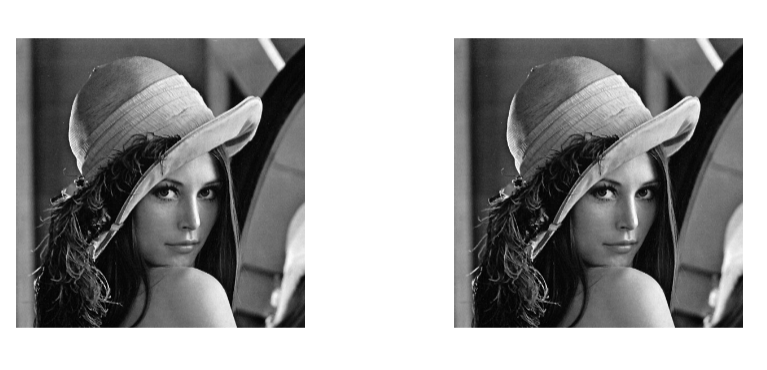

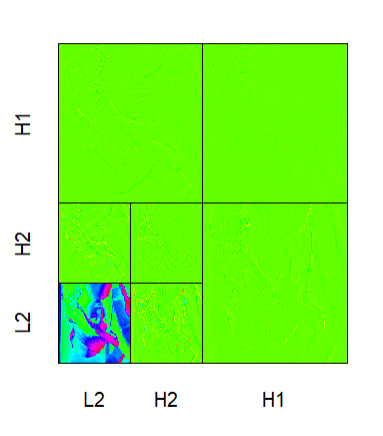

Como podemos observar, el código previo nos descompone la imagen en distintas capas, según el valor de los coeficientes de la imagen, y posteriormente reconstruye la imagen original. Este primer código nos permitió comprender el funcionamiento de la transformada de wavelets y cómo, al manipular las capas que conservamos de la descomposición, podemos influir en la compresión de la imagen (quitando detalle, suavizando, qitando ruido...). Pese a esto, no terminamos de hallar métodos para manipular las capas dentro de los objetos de tipo dwt.2d, que son los nativos de esta librería. Por elolo, decidimos trasladar el proyecto a Python, ya que bajo nuestro punto de vista posee un mayor número de librerías con las qu epoder experimentar y trabajar.

### Compresión de imágenes en Python

Pasamos todo el desarrollo práctico del proyecto a Python.

La compresión de imágenes por wavelets es un proceso que utiliza la transformada wavelet discreta 2D para descomponer una imagen en diferentes frecuencias y direcciones. La transformada wavelet discreta 2D se realiza utilizando una familia de wavelets, como `haar`, `db`, `sym` o `coif`. Los coeficientes resultantes se comprimen aplicando un determinado `threshold` con un `mode` particular, permitiendo entonces reconstruir la imagen comprimida. Para establecer un wavelet u otro se utilizará el parámetro `wavelet`, destacando `haar` y `db2`.

El proceso de compresión de imágenes por wavelets implica los siguientes pasos:

1. Cargar la imagen original.
2. Realizar una transformada wavelet discreta 2D en la imagen utilizando una familia de wavelets especificada.
3. Comprimir los coeficientes resultantes mediante un umbral suave.
4. Reconstruir la imagen comprimida utilizando los coeficientes comprimidos.
5. Visualizar la imagen original y la imagen comprimida.

La compresión de imágenes por wavelets puede ser utilizada para reducir el tamaño de las imágenes digitales sin perder demasiada información visual. Sin embargo, es importante tener en cuenta que la calidad de la imagen comprimida depende del valor del umbral suave utilizado y de la familia de wavelets seleccionada.

(1) Uso de la Transformada de Wavelet para la compresión de imágenes .... http://lcr.uns.edu.ar/fvc/NotasDeAplicacion/FVC-Gonzalo%20D%20Acosta.pdf.

(2) Compresión de imágenes con Wavelets y Multiwavelets - Redalyc. https://www.redalyc.org/articulo.oa?id=498850160008.

(3) Tratamiento de imágenes digitales mediante wavelets. http://personales.upv.es/aperis/wavelets/imagenes/indice.htm.

(4) Compresión de imágenes Haar Wavelet - Studocu. https://www.studocu.com/es-mx/document/universidad-autonoma-de-coahuila/algebra-lineal/compresion-de-imagenes-haar-wavelet/3068260.

(5) Compresión de Imágenes Fijas utilizando la Trasformada Wavelet - CORE. https://core.ac.uk/download/pdf/15780665.pdf.

(6) Single-level 2-D discrete wavelet transform - MATLAB dwt2 - MathWorks. https://www.mathworks.com/help/wavelet/ref/dwt2.html.

(7) Filters (Wavelet): Thresholding - MIPAV - National Institutes of Health. https://mipav.cit.nih.gov/pubwiki/index.php/Filters_%28Wavelet%29:_Thresholding.

(8) python - How to find threshold value and which wavelet family to use .... https://stackoverflow.com/questions/59886413/how-to-find-threshold-value-and-which-wavelet-family-to-use-for-low-pass-filter.

#### Representación y compresión de familias de Wavelets con librerías especializadas (un primer vistazo)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


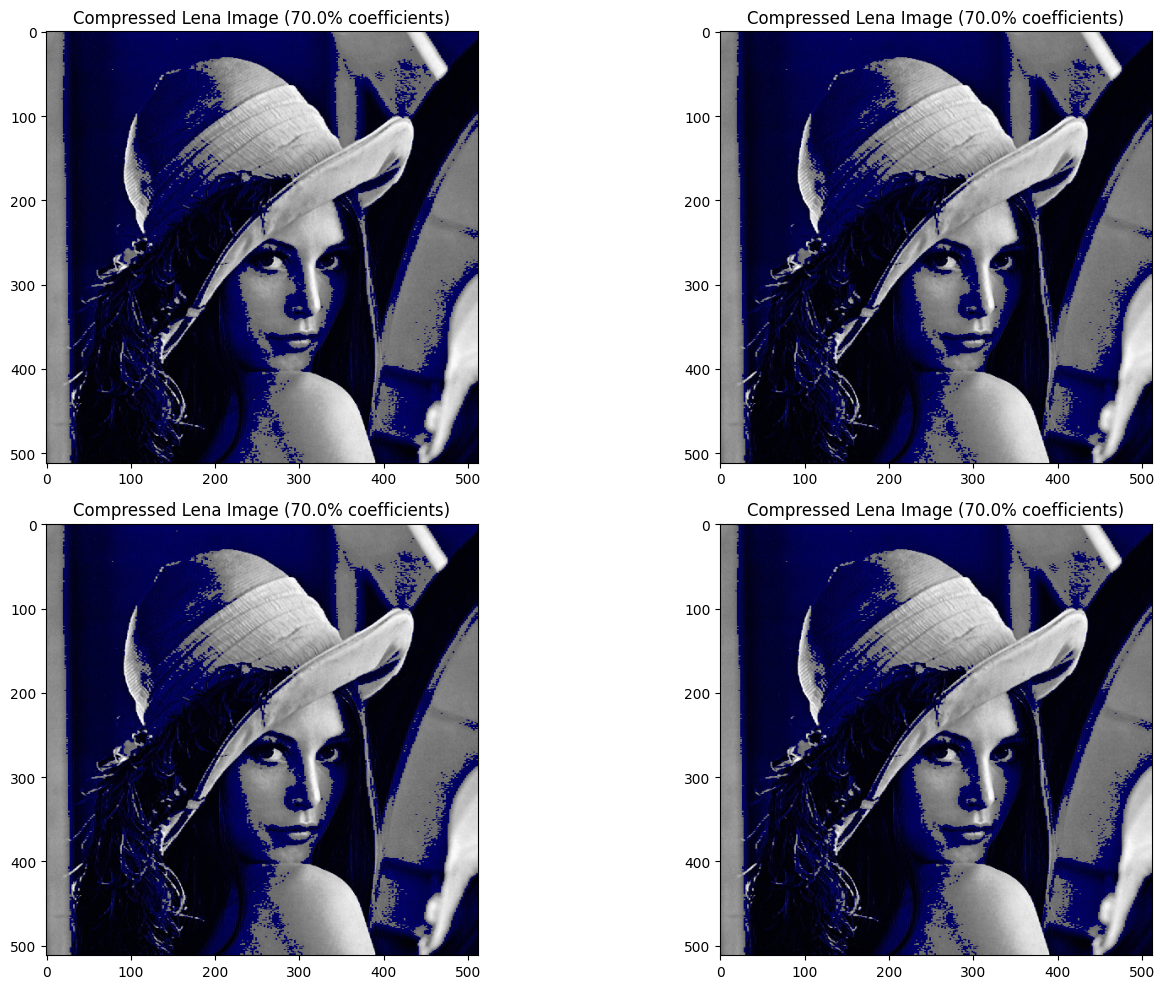

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pywt

# Load the Lena image
lena_image = mpimg.imread('./data/Lena.png')  # Replace 'lena.png' with the path to your image

# Define the compression ratio (e.g., keep only 50% of coefficients)
compression_ratio = 0.7

# Convert the Lena image to grayscale if it's in color
if lena_image.shape[-1] == 3:
    lena_image = np.mean(lena_image, axis=-1)

# Perform the 2D Discrete Wavelet Transform (DWT)
coeffs = pywt.dwt2(lena_image, 'haar')

# Extract the LL (low-frequency) coefficient
cA, (cH, cV, cD) = coeffs
compressed_cA = cA
compressed_cH = cH
compressed_cV = cV
compressed_cD = cD

# Calculate the threshold for compression
thresholdA = np.percentile(np.abs(compressed_cA), (1 - compression_ratio) * 100)
thresholdH = np.percentile(np.abs(compressed_cH), (1 - compression_ratio) * 100)
thresholdV = np.percentile(np.abs(compressed_cV), (1 - compression_ratio) * 100)
thresholdD = np.percentile(np.abs(compressed_cD), (1 - compression_ratio) * 100)

# Set coefficients below the threshold to zero
compressed_cA[np.abs(compressed_cA) < thresholdA] = 0
compressed_cH[np.abs(compressed_cH) < thresholdH] = 0
compressed_cV[np.abs(compressed_cV) < thresholdV] = 0
compressed_cD[np.abs(compressed_cD) < thresholdD] = 0

# Reconstruct the compressed image
compressed_image_cA = pywt.idwt2((compressed_cA, (cH, cV, cD)), 'haar')
compressed_image_cH = pywt.idwt2((cA, (compressed_cH, cV, cD)), 'haar')
compressed_image_cV = pywt.idwt2((cA, (cH, compressed_cV, cD)), 'haar')
compressed_image_cD = pywt.idwt2((cA, (cH, cV, compressed_cD)), 'haar')

# Plot the original and compressed images
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(compressed_image_cA, cmap='gray')
plt.title(f'Compressed Lena Image ({compression_ratio * 100}% coefficients)')

plt.subplot(2, 2, 2)
plt.imshow(compressed_image_cH, cmap='gray')
plt.title(f'Compressed Lena Image ({compression_ratio * 100}% coefficients)')

plt.subplot(2, 2, 3)
plt.imshow(compressed_image_cV, cmap='gray')
plt.title(f'Compressed Lena Image ({compression_ratio * 100}% coefficients)')

plt.subplot(2, 2, 4)
plt.imshow(compressed_image_cD, cmap='gray')
plt.title(f'Compressed Lena Image ({compression_ratio * 100}% coefficients)')

plt.tight_layout()



In [7]:
print(pywt.wavelist(kind='discrete'))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


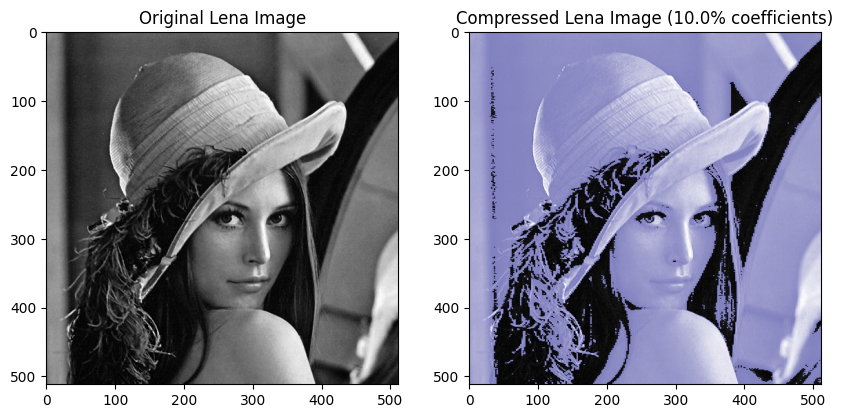

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pywt

# Load the Lena image
lena_image = mpimg.imread('./data/Lena.png')  # Replace 'lena.png' with the path to your image

# Define the compression ratio (e.g., keep only 50% of coefficients)
compression_ratio = 0.1

# Convert the Lena image to grayscale if it's in color
if lena_image.shape[-1] == 3:
    lena_image = np.mean(lena_image, axis=-1)

# Perform the 2D Discrete Wavelet Transform (DWT)
coeffs = pywt.dwt2(lena_image, 'haar')

# Extract the LL (low-frequency) coefficient
cA, (cH, cV, cD) = coeffs
compressed_cV = cV

# Calculate the threshold for compression
threshold = np.percentile(np.abs(compressed_cV), (1 - compression_ratio) * 100)

# Set coefficients below the threshold to zero
compressed_cV[np.abs(compressed_cV) < threshold] = 0

# Reconstruct the compressed image
compressed_image = pywt.idwt2((cA, (cH, compressed_cV, cD)), 'haar')

# Plot the original and compressed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(lena_image, cmap='gray')
plt.title('Original Lena Image')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title(f'Compressed Lena Image ({compression_ratio * 100}% coefficients)')
plt.show()

In [9]:
import pywt # pip install pywavelets
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def compress_image(image_path, wavelet_family):
    # Load the image
    image = Image.open(image_path).convert('L')
    # Convert the image to a numpy array
    image_array = np.array(image)
    # Decompose the image using the specified wavelet family
    coeffs = pywt.dwt2(image_array, wavelet_family)
    # Discard some of the coefficients to compress the image
    compressed_coeffs = [pywt.threshold(i, value = 5, mode='garrote') for i in coeffs] #th dfault value = 0.1, mode dfault value = soft
    # Reconstruct the compressed image
    compressed_image = pywt.idwt2(compressed_coeffs, wavelet_family)
    # Convert the numpy array back to an image
    compressed_image = Image.fromarray(np.uint8(compressed_image))
    return compressed_image

# Example usage:
image_path = 'data/Lena.png'
wavelet_family = 'haar'
compressed_image = compress_image(image_path, wavelet_family)
compressed_image.show()
compressed_image.save("./data/Lena_comp_haar_th_5_mode_garrote_filter_LoD.png","PNG")

#### Representación y compresión de familias de Wavelets manualmente

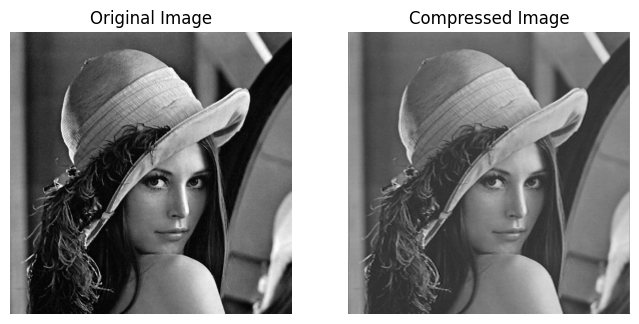

In [10]:
import cv2 # pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt

def daubechies_wavelet(data):

    # Coeficientes de Daubechies
    h0 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    h1 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))

    # Convolución con los coeficientes
    cA = np.convolve(data, h0, mode = 'same')
    cD = np.convolve(data, h1, mode = 'same')

    return cA, cD

def inverse_daubechies_wavelet(cA, cD):

    # Coeficientes inversos
    g0 = (3 - np.sqrt(3)) / (4 * np.sqrt(2))
    g1 = (1 - np.sqrt(3)) / (4 * np.sqrt(2))

    # Convolución con los coeficientes inversos
    data_approx = np.convolve(cA, g0, mode='same')
    data_detail = np.convolve(cD, g1, mode='same')

    return data_approx + data_detail

def haar_wavelet(data):

    h0 = np.array([0.5, 0.5])
    h1 = np.array([-0.5, 0.5])

    cA = np.convolve(data, h0, mode='same')
    cD = np.convolve(data, h1, mode='same')
        
    return cA, cD

def inverse_haar_wavelet(cA, cD):

    h0 = np.array([0.5, 0.5])
    h1 = np.array([-0.5, 0.5])

    data_approx = np.convolve(cA, h0, mode='same')
    data_detail = np.convolve(cD, h1, mode='same')

    return data_approx + data_detail

def coiflet_wavelet(data):
        
    h0 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    h1 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))
    h2 = (3 - np.sqrt(3)) / (4 * np.sqrt(2))
    h3 = (1 - np.sqrt(3)) / (4 * np.sqrt(2))

    # Convolution with wavelet coefficients
    cA = np.convolve(data, [h0, h1, h2, h3], mode='same')
    cD = np.convolve(data, [-h3, h2, -h1, h0], mode='same')

    return cA, cD

def inverse_coiflet_wavelet(cA, cD):
        
    h0 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    h1 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))
    h2 = (3 - np.sqrt(3)) / (4 * np.sqrt(2))
    h3 = (1 - np.sqrt(3)) / (4 * np.sqrt(2))

    # Convolution with inverse wavelet coefficients
    data_approx = np.convolve(cA, [h0, h1, h2, h3], mode='same')
    data_detail = np.convolve(cD, [-h3, h2, -h1, h0], mode='same')

    return data_approx + data_detail

def wavelet_compress(image_path, compression_ratio = 0.1, wavelet_family = 'daubechies_1'):

    # Carga de la imagen en escala de grises
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Convolución con la wavelet
    if wavelet_family == 'daubechies_1':
        flattened_image = original_image.flatten()
        cA, cD = daubechies_wavelet(flattened_image)

    elif wavelet_family == 'haar':
        flattened_image = original_image.flatten()
        cA, cD = haar_wavelet(flattened_image)

    elif wavelet_family == 'coiflet_1':
        flattened_image = original_image.flatten()
        cA, cD = coiflet_wavelet(flattened_image)

    else:
        raise Exception(f'La familia de wavelets {wavelet_family} no está implementada.')
    
    # Compresión: eliminamos coeficientes por debajo del umbral
    threshold = compression_ratio * np.max(np.abs(cD))
    cD_thresholded = np.where(np.abs(cD) < threshold, 0, cD)

    # Transformada inversa
    if wavelet_family == 'daubechies_1':
        compressed_image_flat = inverse_daubechies_wavelet(cA, cD_thresholded)
        compressed_image = compressed_image_flat.reshape(original_image.shape)

    elif wavelet_family == 'haar':
        compressed_image_flat = inverse_haar_wavelet(cA, cD_thresholded)
        compressed_image = compressed_image_flat.reshape(original_image.shape)

    elif wavelet_family == 'coiflet_1':
        compressed_image_flat = inverse_coiflet_wavelet(cA, cD_thresholded)
        compressed_image = compressed_image_flat.reshape(original_image.shape)
    
    # Guaradado de la imagen comprimida
    output_image_path = f'./data/Lena_{wavelet_family}.png'
    cv2.imwrite(output_image_path, compressed_image.astype(np.uint8))

    # Representación
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(compressed_image, cmap='gray')
    plt.title('Compressed Image')
    plt.axis('off')

    plt.show()

    return compressed_image

# Example usage
input_image_path = './data/Lena.png'
wavelet_family = 'coiflet_1'
compression_ratio = 0.1

compressed_image = wavelet_compress(input_image_path, compression_ratio, wavelet_family)

Intentamos implementar las transformaciones continuas de wavelets, con resultados poco satisfactorios.

También intentamos realizar la transformación wavelet por niveles manualmente. Los resultados no son correctos, ya que se observa como las sucesivas capas de aproximación sufren un desplazamiento espacial respecto a las de detalle. ESto se debe a que el código no sigue el algoritmo de Mallat.

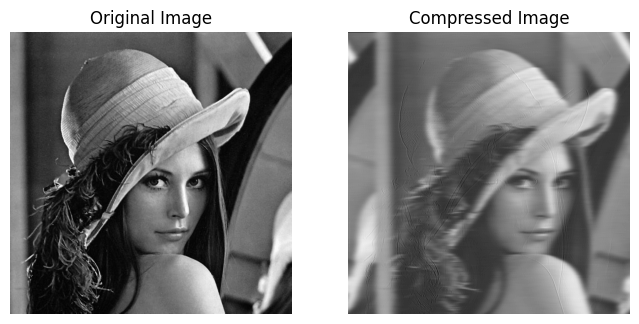

In [11]:
import cv2 # pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt

def haar_wavelet(data):

    h0 = np.array([0.5, 0.5])
    h1 = np.array([-0.5, 0.5])
    cA = np.convolve(data, h0, mode = 'same')
    cD = np.convolve(data, h1, mode = 'same')
    return cA, cD

def inverse_haar_wavelet(cA = [], cD = []):

    if not(len(cA) > 0 or len(cD) > 0):
        raise Exception("Debe seleccionar al menos una capa.")
    
    if len(cA) > 0:
        h0 = np.array([0.5, 0.5])
        data_approx = np.convolve(cA, h0, mode = 'same')
    else:
        data_approx = 0
        
    if len(cD) > 0:
        h1 = np.array([-0.5, 0.5])
        data_detail = np.convolve(cD, h1, mode = 'same')
    else:
        data_detail = 0
    
    return data_approx + data_detail

image_path = './data/Lena.png'
n_niveles = 100
cA = []
cD = []
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
flattened_image = original_image.flatten()
cA_0, cD_0 = haar_wavelet(flattened_image)
cA.append(cA_0)
cD.append(cD_0)
for i in range(1, n_niveles):
    cAi, cDi = haar_wavelet(cA[i - 1])
    cA.append(cAi)
    cD.append(cDi)

compressed_image_flat = inverse_haar_wavelet(cA = cA[-1], cD = cD[0])
compressed_image = compressed_image_flat.reshape(original_image.shape)

plt.figure(figsize = (8, 4))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap = 'gray')
plt.title('Compressed Image')
plt.axis('off')

plt.show()

Usamos el algoritmo de Mallat.

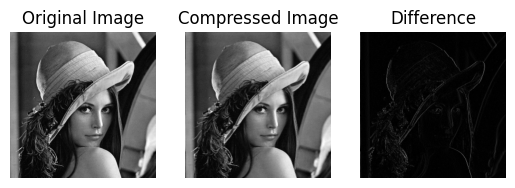

Índice de Similitud Estructural (SSIM): 0.7848317931724772
(512, 512)
(512, 512)
Error Cuadrático Medio (MSE): 254.84636306762695


In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def daubechies_wavelet(data):

    # Coeficientes de Daubechies
    h0 = (1 + np.sqrt(3)) / (4 * np.sqrt(2))
    h1 = (3 + np.sqrt(3)) / (4 * np.sqrt(2))

    # Convolución con los coeficientes
    cA = np.convolve(data, h0, mode = 'same')
    cD = np.convolve(data, h1, mode = 'same')

    return cA, cD

def convolve(signal, kernel):
    # Realiza la convolución de la señal con el kernel
    return np.convolve(signal, kernel, mode='same')

def dwt_mallat(signal, low_pass_filter, high_pass_filter, levels=1):
    approximations = []
    details = []

    # Realiza la descomposición en N niveles
    for _ in range(levels):
        # Filtrado de paso bajo (suavizado)
        approx = convolve(signal, low_pass_filter)
        # Filtrado de paso alto (detalles)
        detail = convolve(signal, high_pass_filter)

        # Submuestreo
        approximations.append(approx[::2])
        details.append(detail[::2])

        # Actualiza la señal para la siguiente iteración
        signal = approximations[-1]

    # Agrega la última aproximación
    approximations.append(signal)

    return approximations, details

def idwt_mallat(approximations, details, low_pass_filter, high_pass_filter):
    # Realiza la reconstrucción
    reconstructed_signal = approximations[-1]

    for approx, detail in zip(reversed(approximations[:-1]), reversed(details)):
        # Upsample y convolución con el filtro de paso bajo
        upsampled_approx = np.zeros(2 * len(approx))
        upsampled_approx[::2] = approx
        upsampled_approx = convolve(upsampled_approx, low_pass_filter)

        # Upsample y convolución con el filtro de paso alto
        upsampled_detail = np.zeros(2 * len(detail))
        upsampled_detail[::2] = detail
        upsampled_detail = convolve(upsampled_detail, high_pass_filter)

        # Suma las dos contribuciones para la reconstrucción
        reconstructed_signal = upsampled_approx + upsampled_detail

    return reconstructed_signal

# Ejemplo de uso
image_path = "./data/Lena.png"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
flattened_image = original_image.flatten()
low_pass_filter = np.array([0.7071067811865476, 0.7071067811865476])  # Filtro de paso bajo para la wavelet Haar
high_pass_filter = np.array([-0.7071067811865476, 0.7071067811865476])  # Filtro de paso alto para la wavelet Haar
levels_of_decomposition = 2

# Realiza la DWT de Mallat
approximations, details = dwt_mallat(flattened_image, low_pass_filter, high_pass_filter, levels=levels_of_decomposition)
# print("Approximations:", approximations)
# print("Details:", details)
compression_ratio = 0.8
threshold = compression_ratio * np.max(np.abs(details[-1]))
details[-1] = np.where(np.abs(details[-1]) < threshold, 0, details[-1])

# Realiza la IDWT de Mallat para reconstruir la señal original
compressed_image_flat = idwt_mallat(approximations, details, low_pass_filter, high_pass_filter)
compressed_image = compressed_image_flat.reshape(original_image.shape)
difference = np.abs(original_image - compressed_image)
# print("Reconstructed Signal:", reconstructed_signal)

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(difference, cmap='gray')
plt.title('Difference')
plt.axis('off')

plt.show()

from skimage.metrics import structural_similarity as ssim

# Calcular el SSIM
data_range = original_image.max() - original_image.min()
ssim_index, _ = ssim(original_image, compressed_image, full=True, data_range=data_range)

# Imprimir el resultado
print(f'Índice de Similitud Estructural (SSIM): {ssim_index}')

# Puedes interpretar el valor de SSIM. Un SSIM de 1 indica que las imágenes son idénticas.
# Valores cercanos a 1 indican alta similitud estructural.
# Cuanto más bajo es el SSIM, más diferencias hay entre las imágenes.

print(original_image.shape)
print(compressed_image.shape)

# Calcular el Error Cuadrático Medio (MSE)
mse = np.sum((original_image - compressed_image) ** 2) / float(original_image.shape[0] * original_image.shape[1])

# Imprimir el resultado
print(f'Error Cuadrático Medio (MSE): {mse}')

#### Compresión de imágenes Single-Level con librería especializada: manera generalizada

##### Función para hacer check de paquetes instalados

In [13]:
import pkg_resources
import subprocess

def check_packages(package_list):
    for package_name in package_list:
        try:
            pkg_resources.get_distribution(package_name)
        except pkg_resources.DistributionNotFound:
            print(f"{package_name} no está instalado. Instalando...")
            subprocess.check_call(["pip", "install", package_name])
            print(f"{package_name} ha sido instalado correctamente.")

# packages_to_check = ['scikit-image', 'scipy', 'opencv-python']
# check_packages(packages_to_check)

##### Función compress_image (la fundamental para la compresión single-level)

¿Qué hace básicamente está función?

1. Preparación de la imagen: Toma una imagen (puede ser en escala de grises o en RGB) y la prepara para el procesamiento.

2. Descomposición Wavelet: Aplica la transformada wavelet a la imagen para obtener coeficientes de aproximación y detalles en diferentes niveles y para diferentes canales de color (si la imagen es en RGB).

3. Visualización Opcional: Ofrece la posibilidad de mostrar gráficos de los detalles y la aproximación resultante de la descomposición wavelet.

4. Compresión: Aplica un umbral a estos coeficientes wavelet, lo que esencialmente reduce la cantidad de información en la imagen.

5. Reconstrucción de la imagen: Utiliza los coeficientes modificados para reconstruir la imagen comprimida.

6. Salida y Visualización: Muestra la imagen original y la imagen reconstruida, junto con información sobre la reducción de tamaño en porcentaje.

7. Guardado Opcional: Guarda la imagen comprimida si se establece el parámetro save en True.

https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html -- INFORMACIÓN ESENCIAL 

In [14]:
# Comprobación de paquetes
packages = ['scikit-image', 'scipy', 'opencv-python', 'numpy']
check_packages(packages)

import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt
from PIL import Image
from skimage import exposure 
from scipy import ndimage
import os

def compress_image(image_path, wavelet = 'haar', threshold = 250, substitute = 0, orientation = "vertical", 
                   mode = "garrote", value_low = 50, value_high = 250, plot = True, equalize = True, 
                   save = True, gray = False, levels = 1, plotlevel = 1):
    
    if gray:
        img = Image.open(image_path).convert("L") # lectura como escala de grises.
        img_array = np.array(img)
        
        if orientation == 'vertical':
            img_array = np.fliplr(np.transpose(img_array, (1, 0)))  # Transponer para imágenes verticales
        else:
            img_array = img_array  # No transponer (imágenes horizontales)

        bw = img_array[:, :]
        
        def apply_wavelet_multi_level(img_array, wavelet, levels):
            coeffs = {}
            for level in range(1, levels + 1):
                coeffs_bw = pywt.wavedec2(bw, wavelet, level = level)
                coeffs[level] = (coeffs_bw)
            return coeffs
        
        coeffic = apply_wavelet_multi_level(img_array, wavelet, levels) # le he llamado coeffic porque había un problema con otra cosa que había programado antes
        
        cAnbw = coeffic[plotlevel][0] 
        
        (cHnbw, cVnbw, cDnbw) = coeffic[plotlevel][1]

        coeffs = [cAnbw, cHnbw, cVnbw, cDnbw]
        
        if plot:    
            fig, axs = plt.subplots(1, 4, figsize=(12, 8))

            axs[0].imshow(coeffs[0], cmap = "gray")
            axs[0].set_title('Approximation')

            for j, coeff in enumerate(coeffs[1:]):
                if equalize:
                    equalized_coeff = exposure.equalize_hist(coeff)
                else:
                    equalized_coeff = coeff
                    
                axs[j+1].imshow(equalized_coeff, cmap = 'gray')
                axs[j+1].set_title(f'Detail {j+1} - Level {plotlevel}')

            plt.tight_layout()
            plt.show()
        
        if mode == 'firm':
            coeffs_compressed = [pywt.threshold_firm(i, value_low = value_low, value_high = value_high) for i in coeffs]
        else:
            coeffs_compressed = [pywt.threshold(i, value=threshold, substitute = substitute, mode=mode) for i in coeffs]
    
        # Reconstrucción de canales tras la compresión
        def reconstruct_channel(cA, cH, cV, cD, wavelet_type):
            coeffs = (cA, (cH, cV, cD))
            reconstructed_channel = pywt.idwt2(coeffs, wavelet_type)
            return reconstructed_channel            
        
        reconstructed_bw = reconstruct_channel(*coeffs_compressed, wavelet)
        
        reconstructed_image = Image.fromarray(reconstructed_bw.astype('uint8'))
        
        # Ruta de guardado
        nombre_archivo = os.path.splitext(os.path.split(image_path)[1])[0] # para sacar el nombre antes de la extensión... me es útil en otra parte
        
        output_image_path = os.path.splitext(image_path)[0]
        original_extension = os.path.splitext(image_path)[1]
        output_image_path = f"{output_image_path}_{wavelet}_{mode}_{threshold}{original_extension}"

        reconstructed_image.save(output_image_path)
             
        # Tamaños de imágenes original y reconstruida con su reducción
        original_size = os.path.getsize(image_path) / 1024  # tamaño inicial en KB de la imagen
        reconstructed_size = os.path.getsize(output_image_path) / 1024  # tamaño final en KB de la imagen
        reduction_percentage = ((original_size - reconstructed_size) / original_size) * 100 # reducción de tamaño en porcentaje
        
        if not save:
            os.remove(output_image_path) # útil por si no queremos acumular imágenes y solo queremos el tamaño
    
        # Figura en sí
        if plot:
        
            fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
            axes[0].imshow(img_array, cmap = "gray")
            axes[0].set_title(f'Imagen original')
            axes[0].axis('off')
            axes[0].annotate(f'Tamaño: {original_size:.2f} KB', xy = (0.5, -0.1), xycoords="axes fraction", ha = 'center', va = 'center')

    
            axes[1].imshow(reconstructed_image, cmap = "gray")
            axes[1].set_title(f'Imagen modificada')
            axes[1].axis('off')
            axes[1].annotate(f'Tamaño: {reconstructed_size:.2f} KB \nWavelet: {wavelet} \nThreshold: {threshold} \nMode: {mode}', xy=(0.5, -0.1), xycoords="axes fraction", ha = 'center', va = 'center')
    
            reduction_text = f'Reducción: {reduction_percentage:.2f}%'
            plt.figtext(0.5, 0, reduction_text, ha = 'center', va = 'center')

            plt.tight_layout()
            plt.show()
                     
    else:
        # Carga de la imagen RGB
        img = Image.open(image_path)
        img_array = np.array(img)
    
        if orientation == 'vertical':
            img_array = np.fliplr(np.transpose(img_array, (1, 0, 2)))  # Transponer para imágenes verticales
        else:
            img_array = img_array  # No transponer (imágenes horizontales)
    
    
        # Separar canales RGB de la imagen
        r, g, b = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]

        # Aplicar wavelet en cada canal y hallar coeficientes
        
        def apply_wavelet_multi_level(img_array, wavelet, levels):
            coeffs = {}
            for level in range(1, levels + 1):
                coeffs_r = pywt.wavedec2(r, wavelet, level = level)
                coeffs_g = pywt.wavedec2(g, wavelet, level = level)
                coeffs_b = pywt.wavedec2(b, wavelet, level = level)
                coeffs[level] = (coeffs_r, coeffs_g, coeffs_b)
            return coeffs
        
        coeffic = apply_wavelet_multi_level(img_array, wavelet, levels) # le he llamado coeffic porque había un problema con otra cosa que había programado antes
        
        cAnr = coeffic[plotlevel][0][0] 
        cAng = coeffic[plotlevel][1][0]
        cAnb = coeffic[plotlevel][2][0]
        
        (cHnr, cVnr, cDnr) = coeffic[plotlevel][0][1]
        (cHng, cVng, cDng) = coeffic[plotlevel][1][1]
        (cHnb, cVnb, cDnb) = coeffic[plotlevel][2][1]
        
        r_coeffs = [cAnr, cHnr, cVnr, cDnr]
        g_coeffs = [cAng, cHng, cVng, cDng]
        b_coeffs = [cAnb, cHnb, cVnb, cDnb]
        
    # Ver gráfico de aproximación y detalles
    
        if plot:
            fig, axs = plt.subplots(3, 4, figsize = (12, 8))

            for i, coeffs in enumerate([r_coeffs, g_coeffs, b_coeffs]):

                axs[i, 0].imshow(coeffs[0], cmap = "gray")
                axs[i, 0].set_title(f'{["R", "G", "B"][i]} - Approximation')

        # Contraste mejorado con exposusure.equalize_hist
    
                for j, coeff in enumerate(coeffs[1:]):
                    if equalize:
                        equalized_coeff = exposure.equalize_hist(coeff)
                    else:
                        equalized_coeff = coeff
                               
                    axs[i, j+1].imshow(equalized_coeff, cmap='gray')
                    axs[i, j+1].set_title(f'{["R", "G", "B"][i]} - Detail {j+1} - Level {plotlevel}')

            plt.tight_layout()
            plt.show()

    # Meter threshold en coeficientes para la compresión
        if mode == 'firm':
            r_coeffs_compressed = [pywt.threshold_firm(i, value_low = value_low, value_high = value_high) for i in r_coeffs]
            g_coeffs_compressed = [pywt.threshold_firm(i, value_low = value_low, value_high = value_high) for i in g_coeffs]
            b_coeffs_compressed = [pywt.threshold_firm(i, value_low = value_low, value_high = value_high) for i in b_coeffs]
        else:
            r_coeffs_compressed = [pywt.threshold(i, value=threshold, substitute = substitute, mode=mode) for i in r_coeffs]
            g_coeffs_compressed = [pywt.threshold(i, value=threshold, substitute = substitute, mode=mode) for i in g_coeffs]
            b_coeffs_compressed = [pywt.threshold(i, value=threshold, substitute = substitute, mode=mode) for i in b_coeffs]

        # Reconstrucción de canales tras la compresión
        def reconstruct_channel(cA, cH, cV, cD, wavelet_type):
            coeffs = (cA, (cH, cV, cD))
            reconstructed_channel = pywt.idwt2(coeffs, wavelet_type)
            return reconstructed_channel

    # Reconstrucción de la imagen a partir de los coeficientes comprimidos
    
        reconstructed_r = reconstruct_channel(*r_coeffs_compressed, wavelet)
        reconstructed_g = reconstruct_channel(*g_coeffs_compressed, wavelet)
        reconstructed_b = reconstruct_channel(*b_coeffs_compressed, wavelet)

        # Reconstrucción de la imagen a partir de los canales
        reconstructed_image = np.stack((reconstructed_r, reconstructed_g, reconstructed_b), axis=-1)
        reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)
        
        # Ruta de guardado
        nombre_archivo = os.path.splitext(os.path.split(image_path)[1])[0] # para sacar el nombre antes de la extensión... me es útil en otra parte
        
        output_image_path = os.path.splitext(image_path)[0]
        original_extension = os.path.splitext(image_path)[1]
        output_image_path = f"{output_image_path}_{wavelet}_{mode}_{threshold}{original_extension}"

        reconstructed_image = Image.fromarray(reconstructed_image.astype('uint8'))
        reconstructed_image.save(output_image_path)
        
        # Tamaños de imágenes original y reconstruida con su reducción
        original_size = os.path.getsize(image_path) / 1024  # tamaño inicial en KB de la imagen
        reconstructed_size = os.path.getsize(output_image_path) / 1024  # tamaño final en KB de la imagen
        reduction_percentage = ((original_size - reconstructed_size) / original_size) * 100 # reducción de tamaño en porcentaje

        if not save:
            os.remove(output_image_path) # útil por si no queremos acumular imágenes y solo queremos el tamaño
    
    # Figura en sí
        if plot:
            
            fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
            axes[0].imshow(img_array)
            axes[0].set_title(f'Imagen original')
            axes[0].axis('off')
            axes[0].annotate(f'Tamaño: {original_size:.2f} KB', xy = (0.5, -0.1), xycoords="axes fraction", ha = 'center', va = 'center')
    
        
            axes[1].imshow(reconstructed_image)
            axes[1].set_title(f'Imagen modificada')
            axes[1].axis('off')
            axes[1].annotate(f'Tamaño: {reconstructed_size:.2f} KB \nWavelet: {wavelet} \nThreshold: {threshold} \nMode: {mode}', xy=(0.5, -0.1), xycoords="axes fraction", ha = 'center', va = 'center')
        
            reduction_text = f'Reducción: {reduction_percentage:.2f}%'
            plt.figtext(0.5, 0, reduction_text, ha = 'center', va = 'center')
    
            plt.tight_layout()
            plt.show()

    return nombre_archivo, original_extension, output_image_path, reduction_percentage, reconstructed_image, coeffic

# Uso de la función con valores por defecto


# familias útiles: ['haar', 'db2', 'dmey', ]

# Importante: para acceder a coeficientes deseados se sigue así:
# coeffs[plotlevel][color][0] -> coeficiente de aproximación de orden plotlevel para el color dado por {rojo = 0, blue = 1, green = 2}
# coeffs[plotlevel][color][1] -> tupla de 3 elementos (vectores) para detalles de orden plotlevel para el color dado por {rojo = 0, blue = 1, green = 2}
# coeffs[plotlevel][color][2] -> tupla de 3 elementos (vectores) para detalles de orden (plotlevel - 1) para el color dado por {rojo = 0, blue = 1, green = 2}, ETC.

# Ejemplillo: quiero conseguir cuáles son los coeficientes de detalle de orden 3 para el rojo
# coeffs[3][0][1] (también valdría algo más turbio como coeffs[4][0][2] en teoría, pero bueno)... Esto da una tupla de 3 elementos. 
# Si se quiere desempaquetar se hace (cH3r, cV3r, cD3r) = coeffs[3][0][1] y se tendrían los 3 por separado si se quiere

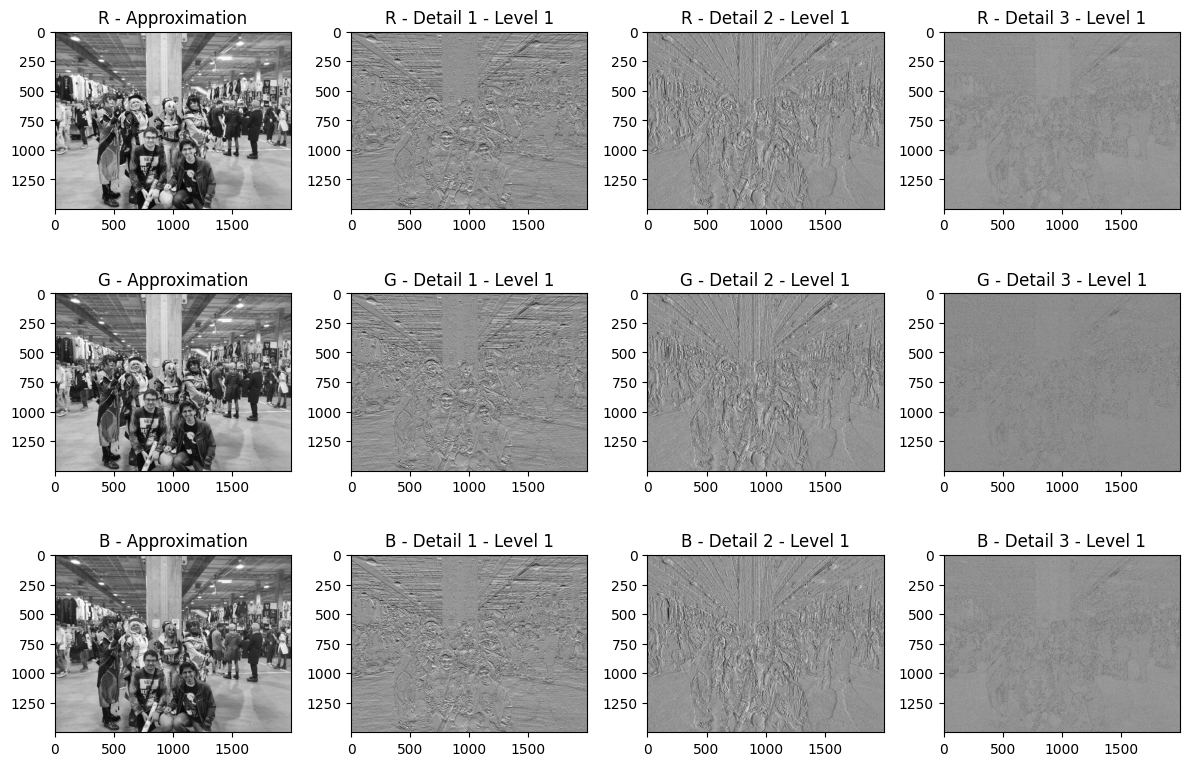

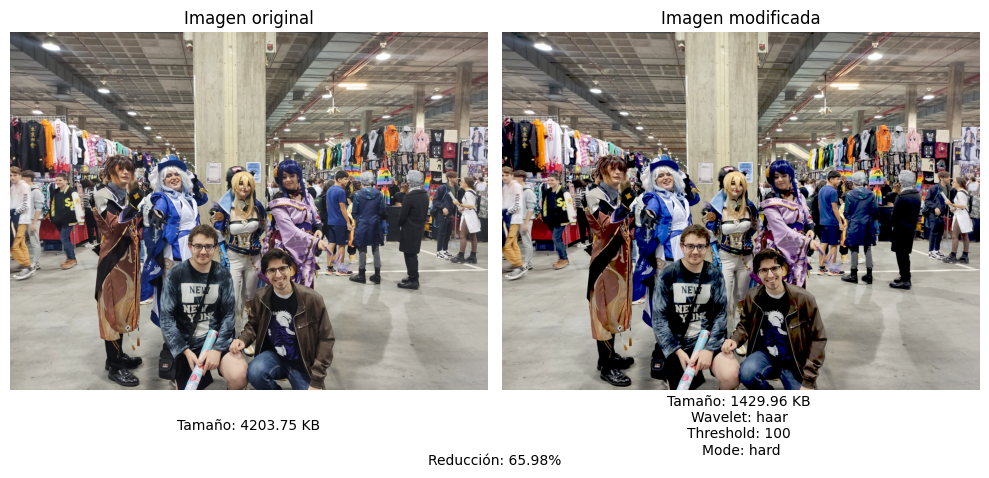

In [15]:
nombre_archivo, original_extension, output_image_path, reduction_percentage, reconstructed, coeffs = compress_image(image_path = './data/genshin.jpg', wavelet = 'haar', threshold = 100, 
                                                                                substitute = 0, orientation = "horizontal", 
                                                                                mode = "hard", value_low = 50, value_high = 250, plot = True, 
                                                                                equalize = True, save = False, gray = False, levels = 4, plotlevel = 1)


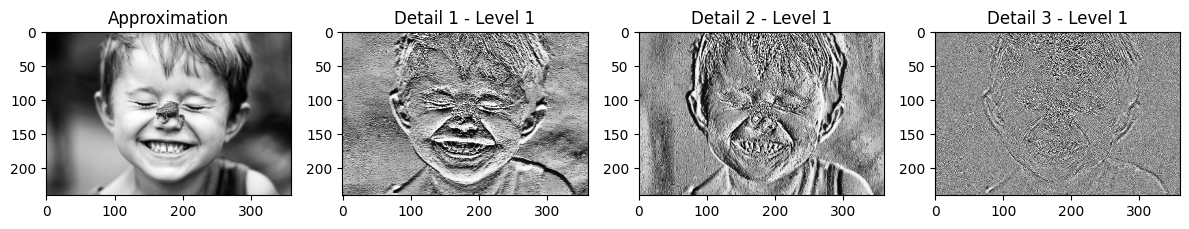

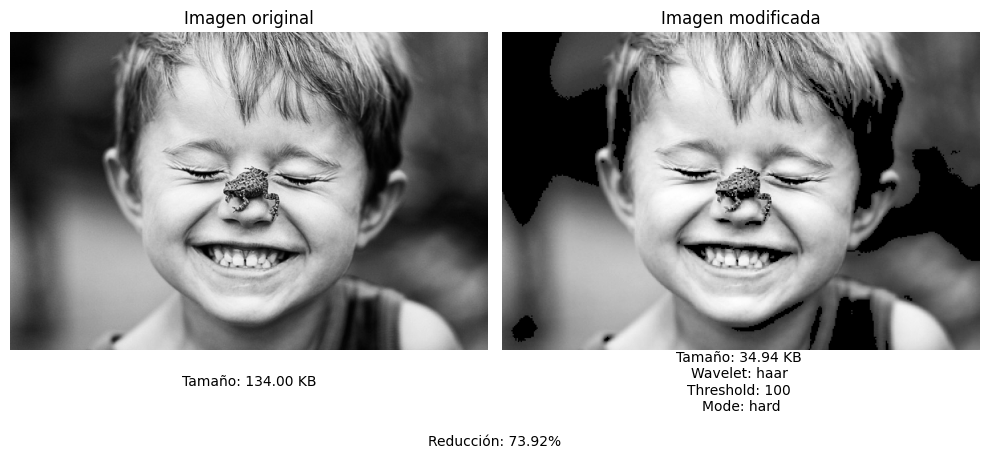

In [16]:
nombre_archivo, original_extension, output_image_path, reduction_percentage, reconstructed, coeffs = compress_image(image_path = './data/nino.jpg', wavelet = 'haar', threshold = 100, 
                                                                                substitute = 0, orientation = "horizontal", 
                                                                                mode = "hard", value_low = 50, value_high = 250, plot = True, 
                                                                                equalize = True, save = False, gray = True, levels = 4, plotlevel = 1)

##### Información acerca de cómo funcionan los distintos modos de pywt.threshold

- MODES

Entrada: array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ])   

Soft thresholding.

Establece en cero (o el valor colocado en *substitute*) los coeficientes cuya magnitud sea menor que el valor umbral (value), reduciendo además el resto de determinada manera.

**Ejemplo:**  
pywt.threshold(data, 2, 'soft')  
Salida: array([ 0. ,  0. ,  0. ,  0.5,  1. ,  1.5,  2. ])  

Estrictamente: data/np.abs(data) * np.maximum(np.abs(data) - value, 0).

Hard thresholding.

Establece en cero (o el valor colocado en *substitute*) los coeficientes cuya magnitud sea menor que el umbral, manteniendo intactos los otros.  

**Ejemplo:**  
pywt.threshold(data, 2, 'hard')  
array([ 0. ,  0. ,  2. ,  2.5,  3. ,  3.5,  4. ])

Greater or less thresholding.

Establecen en cero (o el valor colocado en *substitute*) los coeficientes cuya magnitud sea mayor o menor que el valor umbral, respectivamente.  

**Ejemplo:**  
pywt.threshold(data, 2, 'greater')  
array([ 0. ,  0. ,  2. ,  2.5,  3. ,  3.5,  4. ])  

pywt.threshold(data, 2, 'less')  
array([ 1. ,  1.5,  2. ,  0. ,  0. ,  0. ,  0. ])  

Garrote thresholding.

Se comporta de manera intermedia a *hard* y *soft*. Para valores pequeños es como *soft* y para valores muy grandes se aproxima cada vez más a *hard*.  

**Ejemplo:**  
pywt.threshold(data, 2, 'garrote')  
array([ 0.,  0.,  0. ,  0.9,  1.66666667, 2.35714286,  3.])  

##### Código para comparación entre distintos tipos de wavelets, threshold values y modos

Básicamente aquí se pueden establecer vectores para distintos wavelets, valores de umbral y modos de threshold

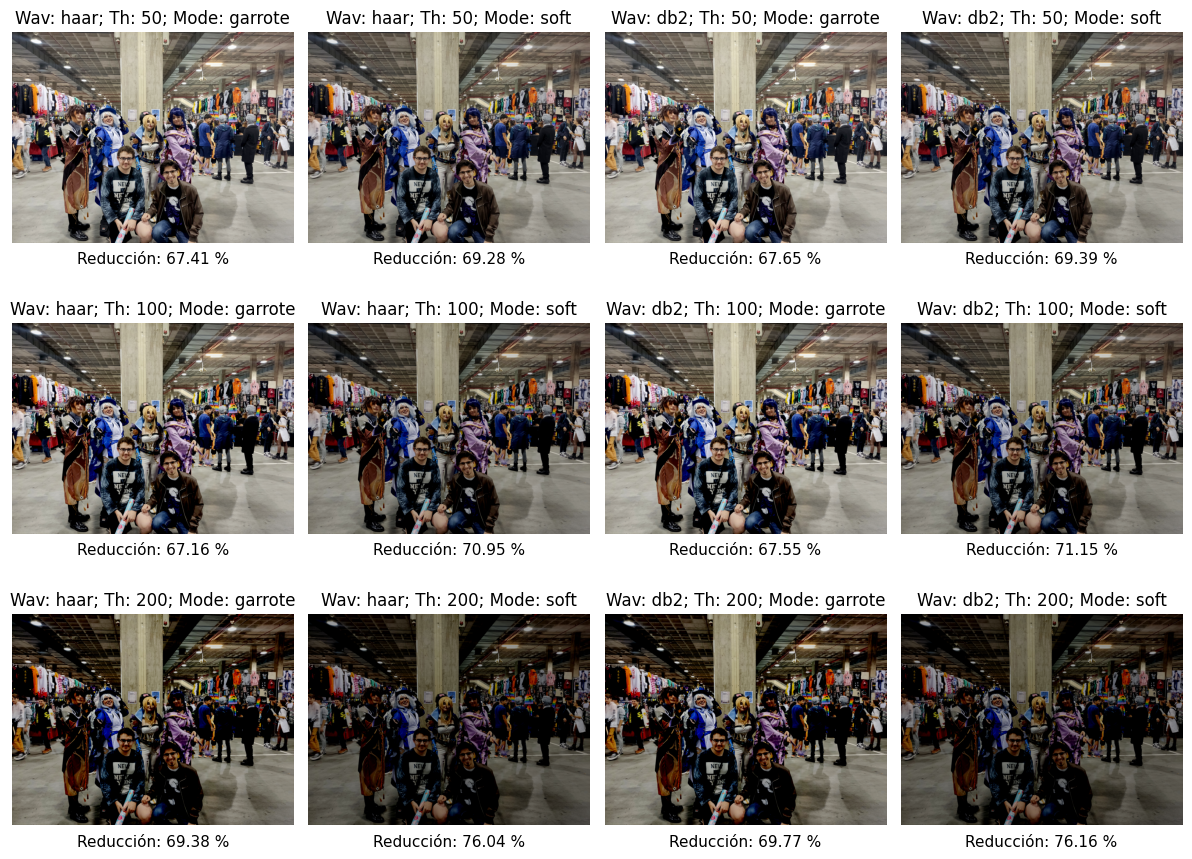

In [17]:
# Listas de parámetros a probar

wavelet_families = ['haar', 'db2']  # Ejemplo de familias de wavelets a probar
threshold_values = [50, 100, 200]  # Ejemplo de valores de threshold a probar
modes = ['garrote', 'soft']  # Ejemplo de modos a probar

num_rows = len(threshold_values)
num_cols = len(wavelet_families) * len(modes)

fig, axes = plt.subplots(nrows = num_rows, ncols = num_cols, figsize = (12, 9))


for i, threshold in enumerate(threshold_values):
    for j, wavelet in enumerate(wavelet_families):
        for k, mode in enumerate(modes):
            _, _, output_image_path, reduction_percentage, reconstructed, _ = compress_image(image_path = './data/genshin.jpg', wavelet = wavelet, threshold = threshold, mode = mode, substitute = 0, orientation = "horizontal", value_low = 50, value_high = 250, plot = False, save = False)
            col_index = j * len(modes) + k
            ax = axes[i, col_index]
            ax.imshow(reconstructed)
            ax.set_title(f'Wav: {wavelet}; Th: {threshold}; Mode: {mode}')
            ax.annotate(f'Reducción: {reduction_percentage:.2f} %', xy = (0.5, -0.1), xycoords = 'axes fraction', ha = 'center', fontsize = 11)
            ax.axis('off')

plt.tight_layout()

plt.savefig('./data/genshin_plot.jpg', dpi = 300)
plt.show()

##### Obtener el threshold adecuado para una reducción buscada de calidad (familia, modo fijas)

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

def find_optimal_threshold(image_path, target_reduction = 80, threshold_ini = 200, wavelet = 'haar', mode = 'garrote', max_iterations = 10, tolerance = 3, step_size = 10, orientation = "vertical", adaptative = True, initial_range = False, gray = False):
    
    img = Image.open(image_path)
    original_size = os.path.getsize(image_path) / 1024  # Tamaño original en KB
    current_reduction = 0
    results = []
    
    if initial_range:
        if (target_reduction >= 65):
            threshold = 250
        elif (target_reduction >= 30 and target_reduction < 65):
            threshold = 150
        else:
            threshold = 100
    else:
        threshold = threshold_ini # valor más o menos medio

    default_step_size = step_size
    
    for it in range(1, max_iterations + 1):
        _, _, output_image_path, _, reconstructed, _ = compress_image(image_path, wavelet = wavelet, threshold = threshold, mode = mode, plot = False, orientation = orientation, save = True, gray = gray)
        reconstructed_size = os.path.getsize(output_image_path) / 1024  # Tamaño de la imagen comprimida en KB
        current_reduction = ((original_size - reconstructed_size) / original_size) * 100

        if abs(current_reduction - target_reduction) < tolerance:
            #print(f"Iteración: {it}, Reducción actual: {current_reduction:.2f} %, Umbral actual: {threshold}")
            print("Alcanzada la reducción deseada dentro del margen de tolerancia.")
            results.append([it, current_reduction, threshold])
            break  # Si se alcanza la compresión deseada dentro de la tolerancia, salir del bucle
        
        #print(f"Iteración: {it}, Reducción actual: {current_reduction:.2f} %, Umbral actual: {threshold}")
        results.append([it, current_reduction, threshold])
        
        os.remove(output_image_path)
        
        # Paso adaptativo
        if adaptative:
            if current_reduction * 1.2 < target_reduction or current_reduction * 0.8 > target_reduction:  # Comprobar la condición adicional
                step_size *= 1.3  # Modificar step_size si se cumple la condición
            else:
                step_size = default_step_size  # Restaurar el valor predeterminado de step_size
            
        # Ajustar el umbral para la siguiente iteración
        if current_reduction < target_reduction:
            threshold += step_size
        else:
            threshold -= step_size
            
    table = pd.DataFrame(results)
    table.columns = ['Iteration', 'Reduction (%)', 'Threshold']
    
    return table, reconstructed, target_reduction, wavelet, mode, threshold

In [19]:
max_iterations = 20

tabla, reconstructed, target_reduction, wavelet, mode, threshold = find_optimal_threshold('./data/genshin.jpg', target_reduction = 85, threshold_ini = 200, wavelet = "haar", max_iterations = max_iterations, mode = "garrote", orientation = "horizontal", step_size = 10, adaptative = True, initial_range = False, gray = False) # adaptative = True permite reducir núm de iteraciones; initial_range establecido un poco a ojo
tabla.head(n = max_iterations)

Alcanzada la reducción deseada dentro del margen de tolerancia.


Iteration  Reduction (%)  Threshold
0           1      69.380947      200.0
1           2      70.247547      213.0
2           3      71.594373      229.9
3           4      72.444386      239.9
4           5      73.367761      249.9
5           6      74.352722      259.9
6           7      75.391415      269.9
7           8      76.490020      279.9
8           9      77.594874      289.9
9          10      78.698683      299.9
10         11      79.786068      309.9
11         12      80.860653      319.9
12         13      81.941649      329.9
13         14      83.110690      339.9

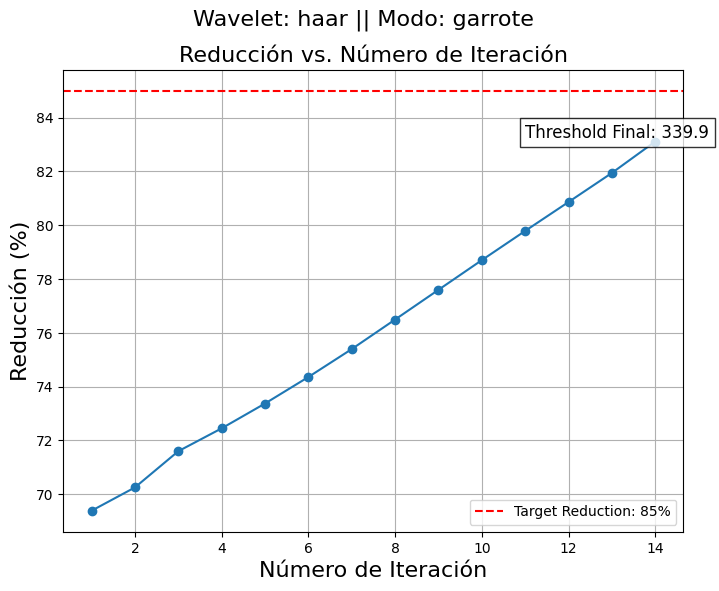

In [20]:
iteraciones = tabla['Iteration']
reducciones = tabla['Reduction (%)']

# Graficar la reducción frente al número de iteración
plt.figure(figsize = (8, 6))
plt.plot(iteraciones, reducciones, marker = 'o', linestyle = '-')
plt.axhline(y = target_reduction, color = 'r', linestyle = '--', label = f'Target Reduction: {target_reduction}%')
plt.title('Reducción vs. Número de Iteración', fontsize = 16)
plt.xlabel('Número de Iteración', fontsize = 16)
plt.ylabel('Reducción (%)', fontsize = 16)
plt.legend()
info_text = f'Wavelet: {wavelet} || Modo: {mode}'
plt.suptitle(info_text, ha = 'center', fontsize = 16)

# Encontrar las coordenadas del último punto
ultimo_punto = (iteraciones.iloc[-1], reducciones.iloc[-1])
plt.text(ultimo_punto[0] - 3, ultimo_punto[1] - 0, f'Threshold Final: {np.round(threshold, 2)}', fontsize = 'large', ha = 'left', va = 'bottom', bbox = dict(facecolor='white', alpha=0.8))

plt.grid(True)
plt.show()

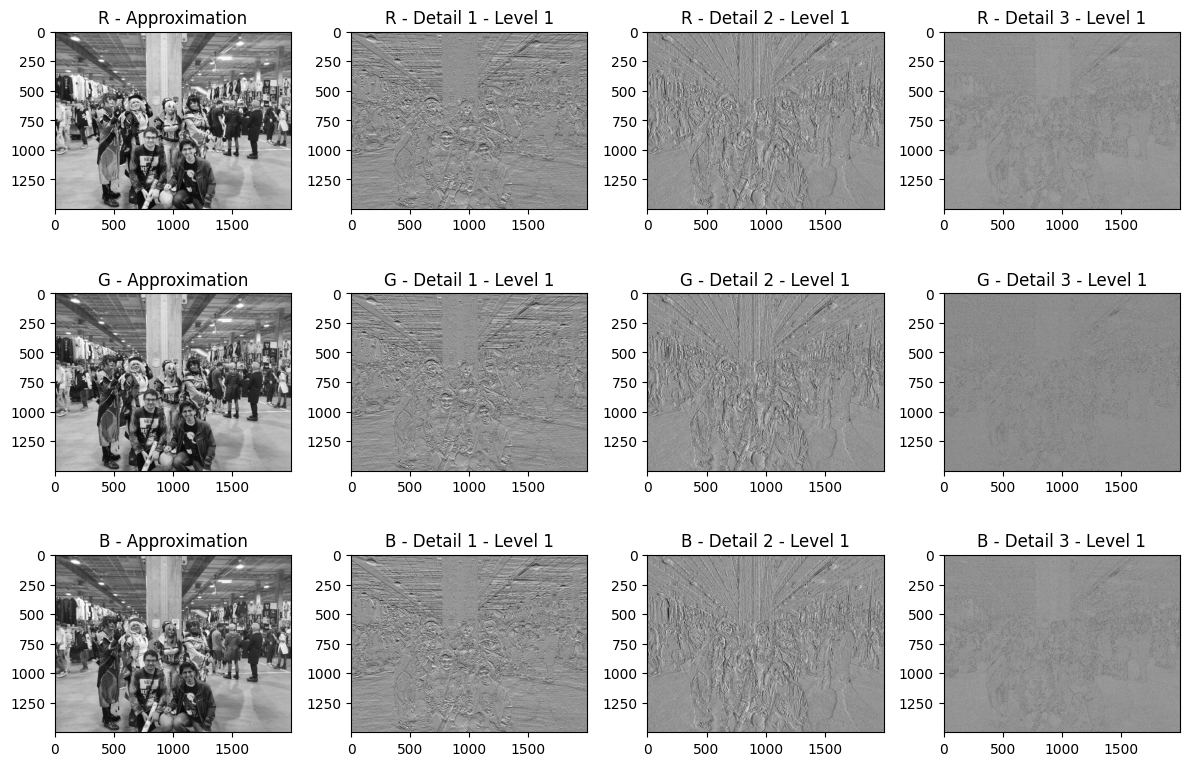

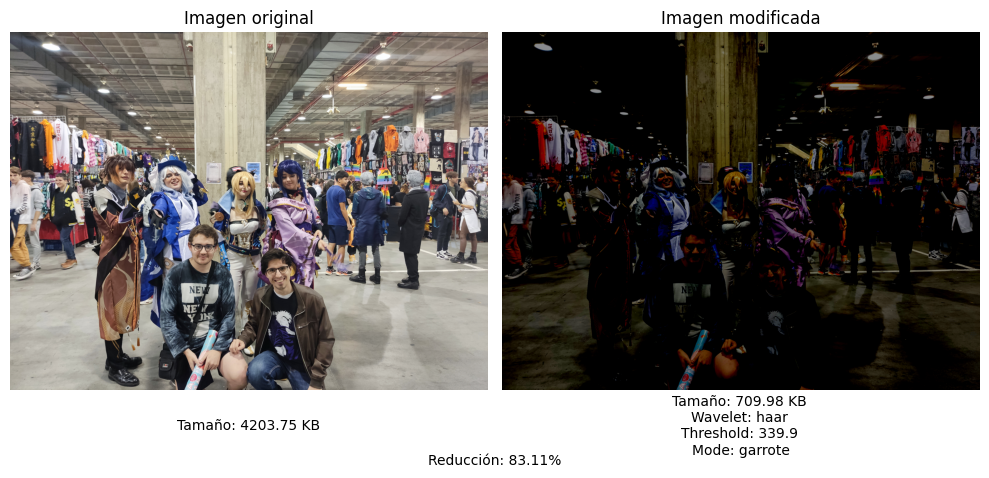

In [21]:
nombre_archivo, original_extension, output_image_path, reduction_percentage, reconstructed, coeffs = compress_image(image_path = './data/genshin.jpg', wavelet = wavelet, threshold = threshold, 
                                                                                substitute = 0, orientation = "horizontal", 
                                                                                mode = mode, value_low = 50, value_high = 250, plot = True, 
                                                                                equalize = True, save = False, gray = False, levels = 4, plotlevel = 1)

##### Aplicación de compresión a una carpeta de nuestras imágenes

Está hecho para que se cree una capreta de destino (path especificado en carpeta_dest) con las imágenes comprimidas. El nombre de estas imágenes es además clarificatorio con la wavelet, threshold y modo aplicado para la compresión.

In [22]:
import os

# Obtener la lista de archivos en la carpeta
carpeta = './data/pack' 
lista_archivos = sorted(os.listdir(carpeta), key = lambda x: os.path.getmtime(os.path.join(carpeta, x)))
carpeta_dest = "./data/pack_comprimido/"

if not os.path.exists(carpeta_dest):
    os.makedirs(carpeta_dest)

wavelet = "haar"
threshold = 200
mode = "hard"
gray = False

for archivo in lista_archivos:
    
    if archivo.endswith(".jpg") or archivo.endswith(".png"):
        
        image_path = os.path.join(carpeta, archivo)
        nombre_archivo, original_extension, output_image_path, reduction_percentage, reconstructed, coeffs = compress_image(image_path = image_path, wavelet = wavelet, threshold = threshold, 
                                                                                mode = mode, orientation = "horizontal", plot = False, save = False)
        output_image_path = f"{carpeta_dest}{nombre_archivo}_{wavelet}_{mode}_{threshold}{original_extension}"
        
        if gray:
            reconstructed.save(output_image_path)
        else:
            reconstructed.save(output_image_path)

           
def obtener_tamano_carpeta(ruta_carpeta):
    tamano_total = 0
    for ruta, directorios, archivos in os.walk(ruta_carpeta):
        for archivo in archivos:
            ruta_archivo = os.path.join(ruta, archivo)
            tamano_total += os.path.getsize(ruta_archivo)
    return tamano_total / 1024


tamano_carpeta_original = obtener_tamano_carpeta(carpeta)
tamano_carpeta_dest = obtener_tamano_carpeta(carpeta_dest) if os.path.exists(carpeta_dest) else 0

reduccion = ((tamano_carpeta_original - tamano_carpeta_dest) / tamano_carpeta_original) * 100 if tamano_carpeta_original > 0 else 0

print("Información de tamaño:")
print("---------------------")
print(f"Tamaño de la carpeta original: {tamano_carpeta_original:.2f} KB")
print(f"Tamaño de la carpeta de destino: {tamano_carpeta_dest:.2f} KB")
print(f"Reducción en tamaño: {reduccion:.2f}%")

Información de tamaño:
---------------------
Tamaño de la carpeta original: 386.34 KB
Tamaño de la carpeta de destino: 199.25 KB
Reducción en tamaño: 48.43%


#### Aplicación a multi-level

##### Nivel de descomposición máximo

La función dwtn_max_level de la librería pywavelets devuelve el nivel máximo de descomposción en que podemos comprimir la imagen (por ejemplo utilizando las función wavedec2) con una determinada familia de wavelets. Esta función es en realidad una generalización para señales n-dimensionales de la función dwt_max_level, la cuál determina el nivel máximo para la descomposición de una señal unidimensional. La función dwt_max_level calcula el nivel máximo de descomposición como el nivel donde hay al menos un coeficiente que no se ve afectado por los efectos de borde. Los efectos de borde son problemas que pueden surgir cuando se aplica una transformada wavelet en los bordes de una señal (en este caso la imagen) debido a la naturaleza finita de la señal y al hecho que las funciones wavelet requieren de un número mínimo de muestras para calcularse adecuadamente. También se puede interpretar este nivel máximo como si la descomposición parase cuando la señal se vuelve más pequeña que la FIR (finite impulse response) del filtro asociado a la wavelet. La expresión analítica de este nivel viene dada por:

max_level = log_2[data_len/(filter_len - 1)] donde data_len y filter_len son los tamaños de la señal original y el filtro respectivamente,

En el caso de señales n-dimensionales, el nivel máximo de descomposición es el mínimo de los niveles máximos calcukados para todos los n ejes.

https://pywavelets.readthedocs.io/en/latest/

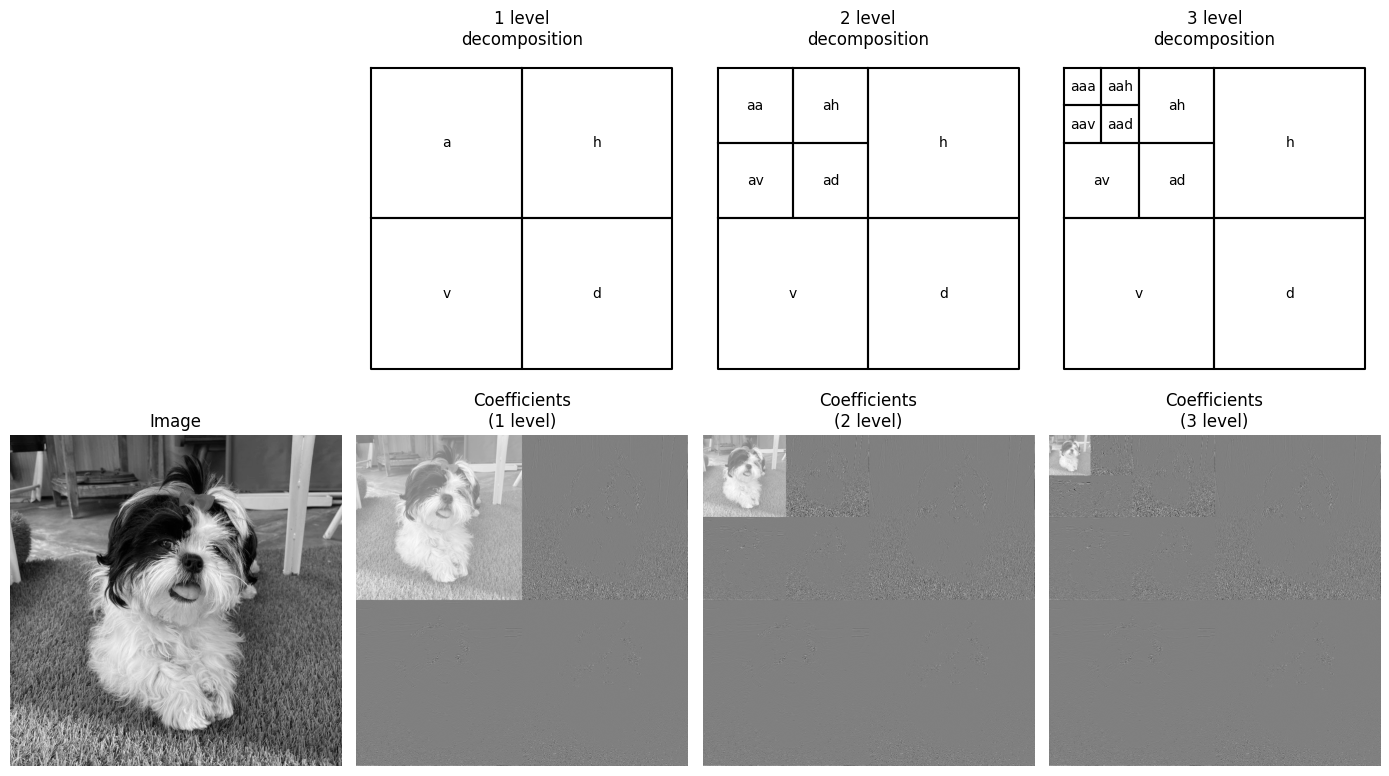

In [23]:
import numpy as np
import pywt
from matplotlib import pyplot as plt
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis
import cv2
from PIL import Image

image_path = 'data/Lola.jpg'
image = Image.open(image_path).convert('L')
x = np.array(image)
shape = x.shape

max_lev = 3       # how many levels of decomposition to draw
label_levels = 3  # how many levels to explicitly label on the plots

fig, axes = plt.subplots(2, 4, figsize=[14, 8])
for level in range(0, max_lev + 1):
    if level == 0:
        # show the original image before decomposition
        axes[0, 0].set_axis_off()
        axes[1, 0].imshow(x, cmap=plt.cm.gray)
        axes[1, 0].set_title('Image')
        axes[1, 0].set_axis_off()
        continue

    # plot subband boundaries of a standard DWT basis
    draw_2d_wp_basis(shape, wavedec2_keys(level), ax=axes[0, level],
                     label_levels=label_levels)
    axes[0, level].set_title('{} level\ndecomposition'.format(level))

    # compute the 2D DWT
    c = pywt.wavedec2(x, 'db2', mode='periodization', level=level)
    # normalize each coefficient array independently for better visibility
    c[0] /= np.abs(c[0]).max()
    for detail_level in range(level):
        c[detail_level + 1] = [d/np.abs(d).max() for d in c[detail_level + 1]]
    # show the normalized coefficients
    arr, slices = pywt.coeffs_to_array(c)
    axes[1, level].imshow(arr, cmap=plt.cm.gray)
    axes[1, level].set_title('Coefficients\n({} level)'.format(level))
    axes[1, level].set_axis_off()

plt.tight_layout()
plt.show()

##### Métodos de comparación de la imagen original y la comprimida

Una vez reaizada la compresión, resulta siempre interesante comparar la imagen comprimida con la imagen original, ya que típicamente queremos mantener un equilbrio entre la compresión de la imagen y su calidad, de manera que se parezca lo máximo posible a la imagen original.

Como ya hemos comentado anteriormente, para comprimir la imagen por el método de las wavelet, dividimos la información de la imagen en subseñales de aproximación y detalle aplicando a la imagen una (o varias) transformaciones wavelet. Los coeficientes de aproximación proporcionan la teendencia general de los píxeles mientras que los coeficientes de detalle proporcionan los cambios o detalles en las direcciones horizontal, vertical y diagonal de la imagen. Para comprimir la imagen establecemos un umbral o "threshold", que no es más que un valor de los coeficientes de detalle por debajo del cual los coeficientes son aproximados a cero. Cuanto mayor sea el número de ceros, mayor podrá ser la compresión alcanzada. Sin embargo, al hacer cero estos coeficientes se pierde cierta cantidad de información de la imagen original. Cuantos más coeficientes se hagan cero mayor será la compresión pero será mayor la pérdida de información de la imagen original, por lo que se debe buscar un balance entre ambos. Por ello, para cuantificar la compresión de la imagen y su semejanza con la imagen original podemos emplear diversos métodos:

+ **Ratio de compresión**

El ratio de compresión es el ratio entre el tamaño de la imagen comprimida y la original. Esre ratio es un indicador cuánto se ha comprimido una imagen en particular. Generalmente, cuanto mayor es el ratio de compresión peor es la calidad de la imagen.

+ **Energía perdida**

En el contexto del procesado de señales, la energía de una imagen es proporcional a la suma del cuadrado de los valores sus píxeles y es una medida de la información presente en la imagen. Por tanto, la pérdida de información puede cuantificarse en forma de la pérdida de energía de la imagen en tanto por cien (energy loss).

+ **Error cuadrático medio**

Otra manera de cuantificar la perdida de información o la diferencia entre la imagen original y la comprimida es mediante el error cuadrático medio, es decir, el error acumulado en cada pixel correspondiente a la imagen original y su análogo en la imagen comprimida al cuadrado.

+ **Índice de Medida de Similitud Estructural (SSIM)**

Este índice también sirve para determinar la similitud de dos imágenes. En particular mide la similitud estructural entre ambas, teniendo en cuenta la luminancia, contraste y estructura. Toma valores entre -1 y 1 siendo 1 el índice para imágenes idénticas, por lo que valores próximos a 1 indican alta similitud. La obtención de este índice es más complejo por lo que podemos usar librerías externas para calcularlo.

+ **Visualización**

Finalmente, para observar de una forma más visual dónde se producen las mayores diferencias entre ambas imágenes, podemos representar las dos juntas así como su diferencia.

#### Proceso de compresion de video

Para comprimir videos mediante `Wavelets`, hemos realizado el proceso en tres fases, primero dividir el video en frames, segundo aplicarle la transformada wavelet de elección y la inversa, tercero volver a unir los frames en video.

In [24]:
import cv2 # pip install opencv-python
import os

# Ruta del video
video_path = './data/baile.mp4'

# Crear una carpeta para almacenar los frames si no existe
output_folder = './data/frames_video_original'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Abre el video
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error al abrir el video")
    exit()

# Lee y guarda cada frame como una imagen
frame_count = 0
while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Guarda el frame en la carpeta de salida como una imagen (puedes cambiar el formato de la imagen si lo deseas)
    output_path = os.path.join(output_folder, f'frame_{frame_count}.jpg')
    cv2.imwrite(output_path, frame)

    frame_count += 1

# Libera el objeto de captura y cierra las ventanas
cap.release()
cv2.destroyAllWindows()


In [25]:
import cv2
import os
import re
import pywt
import numpy as np

# Directorio donde se encuentran los frames de video
frames_dir = './data/frames_video_original'
output_dir = './data/frames_modificados'

# Crear el directorio de salida si no existe
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Obtener la lista de nombres de archivos en el directorio de frames
frame_files = [f for f in os.listdir(frames_dir) if f.endswith('.jpg')]

# Ordenar los nombres de archivos de manera alfanumérica
frame_files.sort(key=lambda x: int(re.search(r'\d+', x).group()))

# Iterar sobre cada frame y aplicar la transformada wavelet de Mallat
for filename in frame_files:
    frame_path = os.path.join(frames_dir, filename)
    frame = cv2.imread(frame_path)   
    
    
    # Aplicar la transformada wavelet ((wavedec2) para varios niveles (por ejemplo, 3 niveles)
    coeffs = pywt.wavedec2(frame, 'db4', level= 3)
    
    # Coeficientes de aproximación y detalle
    cA, cD = coeffs[0], coeffs[1:]
    
    # Función para aplicar threshold basado en un percentil
    def threshold_percentile(coef, percentile):
        threshold = np.percentile(np.abs(coef), percentile)
        thresholded_coef = np.where(np.abs(coef) > threshold, coef, 0)
        return thresholded_coef
    
    thresholded_cD = []
    for i, detail_level in enumerate(cD):
        if i == 0:  # Último nivel de detalle
            thresholded_level = []
            for coef in detail_level:
                percentile = 90  # Cambia este valor según el porcentaje deseado
                thresholded_coef = threshold_percentile(coef, percentile)
                thresholded_level.append(thresholded_coef)
            thresholded_cD.append(tuple(thresholded_level))
        else:
            thresholded_cD.append(tuple(detail_level)) # Mantener los niveles anteriores sin cambios

    # Reconstruir los coeficientes combinando la aproximación y los nuevos coeficientes de detalle
    thresholded_coeffs = (cA, *thresholded_cD)
    
    # Reconstruir la imagen usando los coeficientes transformados
    reconstructed_frame = pywt.waverec2(thresholded_coeffs, 'db4')
    
    # Escalar los valores para evitar valores fuera de rango
    reconstructed_frame = np.clip(reconstructed_frame, 0, 255)
    reconstructed_frame = reconstructed_frame.astype(np.uint8)
    
    # Guardar la imagen reconstruida en el directorio de salida
    output_path = os.path.join(output_dir, 'reconstructed_' + filename)
    cv2.imwrite(output_path, reconstructed_frame)

c:\Users\jesus\AppData\Local\Programs\Python\Python311\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [26]:
import cv2
import os

# Directorio donde se encuentran los frames de video
frames_dir = './data/frames_modificados'
output_video = './data/video_salida.mp4'

# Obtener la lista de nombres de archivos en el directorio de frames
frame_files = [f for f in os.listdir(frames_dir) if f.startswith('reconstructed_frame_') and f.endswith('.jpg')]

# Ordenar los nombres de archivos en orden numérico
frame_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))  # Orden numérico

# Obtener el tamaño del primer frame para configurar el video de salida
first_frame = cv2.imread(os.path.join(frames_dir, frame_files[0]))
height, width, _ = first_frame.shape

# Crear un objeto VideoWriter para guardar el video resultante
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec de video
out = cv2.VideoWriter(output_video, fourcc, 30.0, (width, height))  # 30 fps

# Recorrer cada frame y escribirlo en el video de salida
for filename in frame_files:
    frame = cv2.imread(os.path.join(frames_dir, filename))
    out.write(frame)

# Liberar recursos y cerrar el objeto VideoWriter
out.release()
cv2.destroyAllWindows()

print(f"¡El video '{output_video}' se ha creado exitosamente!")


¡El video './data/video_salida.mp4' se ha creado exitosamente!


In [27]:
check_packages(["moviepy"])
#pip install decorator==4.4.2 SI NO FUNCIONA EL CHUNK ES POR ESTO; YA QUE SE TIENE UNA VERSIÓN MÁS ACTUALIZADA

from moviepy.editor import * # pip install moviepy

# Ruta del archivo de entrada y salida
input_file = './data/video_salida.mp4'
output_file = "./data/video_convertido.mp4"

# Cargar el video con VideoFileClip
video = VideoFileClip(input_file)

# Escribir el video en el nuevo formato sin audio
video.write_videofile(output_file, codec='libx264')


Moviepy - Building video ./data/video_convertido.mp4.
Moviepy - Writing video ./data/video_convertido.mp4



Moviepy - Done !
Moviepy - video ready ./data/video_convertido.mp4
